<a href="https://colab.research.google.com/github/cynttia/salarios-data-science-analise/blob/main/salarios_data_science_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **it's me, hi!**



![99URL](https://media.tenor.com/EQn9ugqWARsAAAAC/brooklyn-nine.gif)

Este notebook terá como foco principal examinar a remuneração dos profissionais da área de Ciência de Dados. Em People Analytics, a coleta desses dados é muito comum e super relevante para realizar análises de massa salarial, desempenho (mérito e promoções) e também otimizar a tomada de decisões na área de Recursos Humanos.

O dataset utilizado para a análise exploratória se encontra no Kaggle: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?resource=download




---



# Importando as bibliotecas e a base para iniciarmos as análises

In [ ]:
# pandas: manipulação dos dados
# seaborn: visualização dos dados
# matpltlib: visualização dos dados (também)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importando o dataset em csv que será utilizado

salario_ds = pd.read_csv("/content/ds_salaries.csv", encoding="ISO-8859-15")

salario_ds.drop(salario_ds.columns[[0]], axis=1, inplace=True) 
salario_ds.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
#Personalizando a paleta de cores

sns.set(color_codes=True)



---


# **Situação: Em análise**

In [ ]:
#Ordenando a lista

experience = salario_ds['experience_level'].sort_values(ascending=True).unique()
experience

array(['EN', 'EX', 'MI', 'SE'], dtype=object)

# **Para começarmos a fazer o comparativo salarial, precisamos entender os significados das siglas:**

###### **EX** = executivo/diretor;
###### **EN** = junior;
###### **MI** = pleno;
###### **SE** = sênior.:

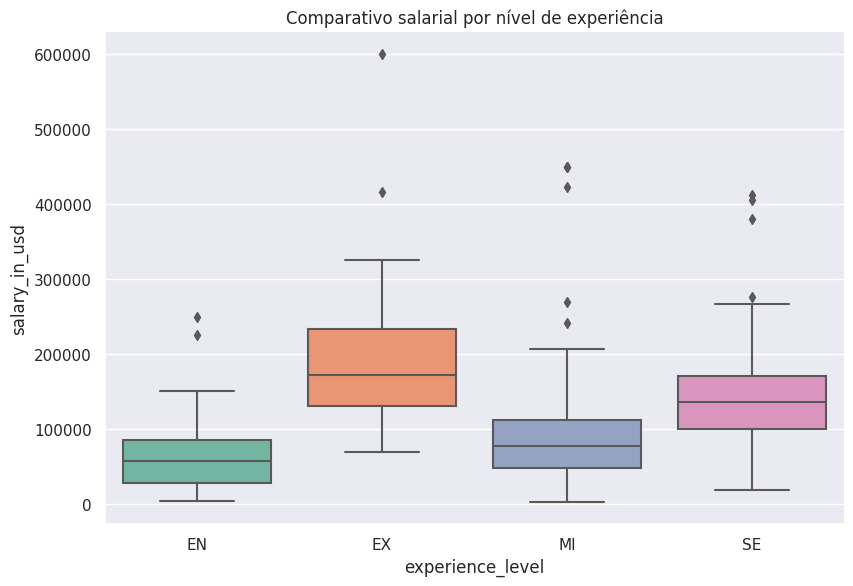

In [ ]:
#Plotar gráfico box com comparativo salarial por nível de experiência. Definindo a paleta de cores no 'with'
with sns.color_palette('Set2'):
      sns.catplot(x='experience_level', y='salary_in_usd', kind = 'box', data=salario_ds, order=experience, height=5.8, aspect=1.5)
      plt.title("Comparativo salarial por nível de experiência", fontsize=12)
      plt.ticklabel_format(axis='y', style='plain')

# **Podemos observar que os Executivos (EX) em Data Science têm salários superiores em comparação aos demais níveis. No entanto, é notável que profissionais plenos (MI) têm uma variação salarial bem aparente, alguns profissionais recebem salários mais altos do que os outros, chegando a ultrapassar a remuneração dos profissionais sênior (SE).**



---



#**Os tops dos tops!**

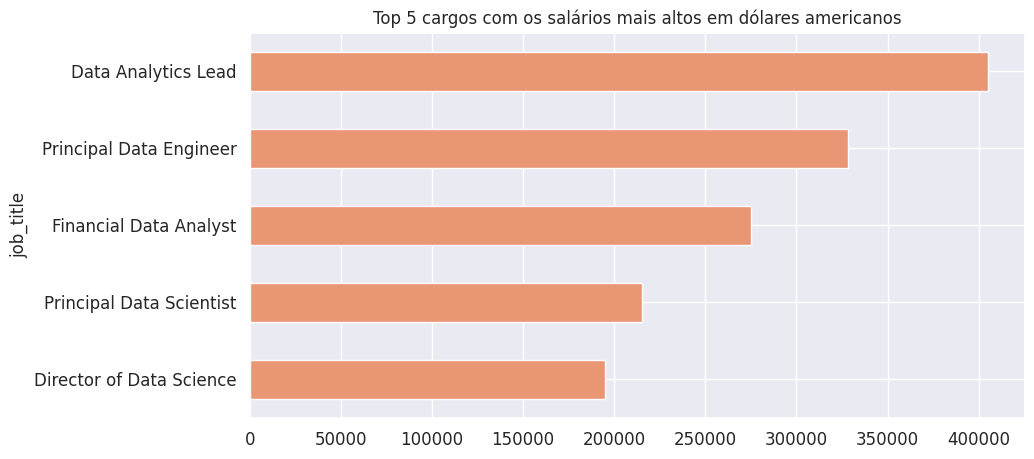

In [ ]:
#Plotar gráfico com os 5 cargos com os maiores salários em dólares
top_5 = salario_ds.groupby('job_title')['salary_in_usd'].mean().nlargest(5).sort_values(ascending=True).plot(kind='barh', figsize=(10,5), color='#E99675',
      title='Top 5 cargos com os salários mais altos em dólares americanos',
      y='job_title',
      fontsize=(12))

![URL99](https://i0.wp.com/68.media.tumblr.com/caa0219ab5a41d9ff16012e961e3e070/tumblr_inline_o36yhtbcSq1rzl2ff_540.gif?resize=540%2C343&ssl=1)

# **Vamos listar esses cargos para melhor análise!**

In [ ]:
#Listando os cargos do ranking por nível de experiência, localização, cargo e salário
top_cargos = salario_ds.loc[(salario_ds['job_title'] == 'Data Analytics Lead') |
                            (salario_ds['job_title'] == 'Principal Data Engineer') |
                            (salario_ds['job_title'] == 'Financial Data Analyst') |
                            (salario_ds['job_title'] == 'Financial Data Science') |
                            (salario_ds['job_title'] == 'Director of Data Science')].sort_values(by='salary_in_usd')
top_cargos[['experience_level', 'company_location', 'job_title', 'company_size', 'salary_in_usd']]

,experience_level,company_location,job_title,company_size,salary_in_usd
461,EN,US,Financial Data Analyst,L,100000
164,EX,DE,Director of Data Science,M,130026
259,EX,DE,Director of Data Science,L,141846
84,EX,PL,Director of Data Science,L,153667
150,SE,JP,Director of Data Science,S,168000
215,SE,US,Principal Data Engineer,L,185000
452,EX,CA,Director of Data Science,L,196979
121,SE,US,Principal Data Engineer,M,200000
167,EX,US,Director of Data Science,L,250000
25,EX,US,Director of Data Science,L,325000


# **Apesar de a maioria dos profissionais serem executivos/diretores na área, nota-se a presença de profissionais sênior, alguns ocupando os mesmos cargos de executivos/diretores. Além disso, observa-se uma variação significativa nos salários de Engenheiros de Dados (Principal), que pode variar de 185 mil dólares até 600 mil dólares.**

# **Na área de Recursos Humanos, identificamos esses casos ao analisar a estrutura de cargos (grade, target e faixas salariais).**

#**É válido também observarmos o tamanho da empresa, percebe-se que a maioria delas são de porte grande (L). Caso tivessemos os dados, poderíamos cruzar o valor das vendas e o número de headcount de cada empresa para obter insights adicionais.**



![URL99](https://media.tenor.com/PuCebIQYUEMAAAAC/jake-noice.gif)



---



# **Calculando a massa salarial**

In [ ]:
#Listando e somando todos os salários por tamanho da empresa
massa_salarial = salario_ds.groupby('company_size')['salary_in_usd'].sum()
massa_salarial

company_size
L    23610113
M    38111182
S     6443512
Name: salary_in_usd, dtype: int64

# **Resumidamente, a massa salarial é a soma dos valores pagos aos colaboradores de uma organização. Através desse indicador, podemos identificar o impacto das remunerações para a empresa, bem como sua influência na economia como um todo.**

# **Com isso, nota-se que a soma dos salários é maior em empresas de médio porte e em segundo lugar de grande porte.**

In [ ]:
#Listando e somando todos os salários por cargo
massa_salarial = salario_ds.groupby('job_title')['salary_in_usd'].sum().sort_values(ascending=False)
massa_salarial

job_title
Data Scientist                              15470860
Data Engineer                               14879700
Data Analyst                                 9010627
Machine Learning Engineer                    4300086
Data Architect                               1956613
Data Science Manager                         1899942
Research Scientist                           1744312
Principal Data Scientist                     1506697
Director of Data Science                     1365518
Machine Learning Scientist                   1267300
Principal Data Engineer                       985000
Data Analytics Manager                        889940
Applied Data Scientist                        878275
Lead Data Engineer                            838347
Head of Data                                  800813
ML Engineer                                   705024
Analytics Engineer                            700000
Data Engineering Manager                      616136
Head of Data Science                

# **Observamos que a soma de salários pagos é maior para Cientistas de Dados e em seguida, com uma soma próxima, temos os Engenheiros de Dados. Concluímos um número elevado de contratação desses profissionais e uma alta demanda de procura.**
# **Em uma matéria da Época Negócios em 2021, afirma-se que as startups investiram mais de US$ 20 bilhões em inteligência artificial.**
# **Além disso, ressaltam que os profissionais de Data Analytics, Data Engineer e Data Science foram os mais recrutados pelas empresas de inteligência de dados ao longo da pandemia, em um crescimento de cerca de 485% em comparação ao mesmo semestre de 2020, segundo levantamento da Intera. Por outro lado, sem dúvidas, ainda há muitos espaços para serem ocupados.**


![99URL](https://media.tenor.com/lmGqPV3Qo6AAAAAC/brooklyn-nine-nine-jake-peralta.gif)





---



# **Análise salarial por ano**

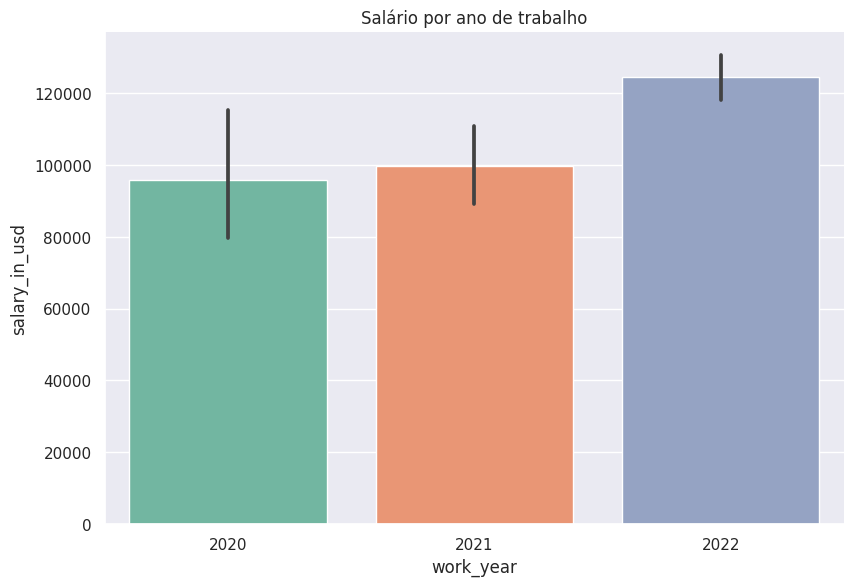

In [ ]:
#Plotar gráfico de barras com média salarial por ano
with sns.color_palette('Set2'):
      sns.catplot(x='work_year', y='salary_in_usd', kind = 'bar', data=salario_ds, height=5.8, aspect=1.5)
      plt.title("Salário por ano de trabalho", fontsize=12)
      plt.ticklabel_format(axis='y', style='plain')

# **O valor de investimento das empresas em profissionais da área de Ciência de Dados aumento consideravelmente em 2022, foram mais de 20 mil doláres acima da média do que no ano anterior.**

In [ ]:
#Filtrando o maior e o menor salário no ano de 2022
salario_anual = salario_ds[salario_ds['work_year'] == 2022]
maior_salario = salario_anual['salary_in_usd'].max()
menor_salario = salario_anual['salary_in_usd'].min()

maior_registro = salario_anual[salario_anual['salary_in_usd'] == maior_salario]
menor_registro = salario_anual[salario_anual['salary_in_usd'] == menor_salario]

print(maior_registro[['job_title', 'company_location', 'work_year', 'salary_in_usd']])
print(menor_registro[['job_title', 'company_location', 'work_year', 'salary_in_usd']])


               job_title company_location  work_year  salary_in_usd
523  Data Analytics Lead               US       2022         405000
                    job_title company_location  work_year  salary_in_usd
521  Computer Vision Engineer               LU       2022          10000


# **O maior salário registrado em 2022 foi para a posição de Líder de Análise de Dados nos Estados Unidos, enquanto o menor salário foi para a posição de Engenheiros de Visão Computacional em Luxemburgo.**



---


# **Data Science x Home Offuce**

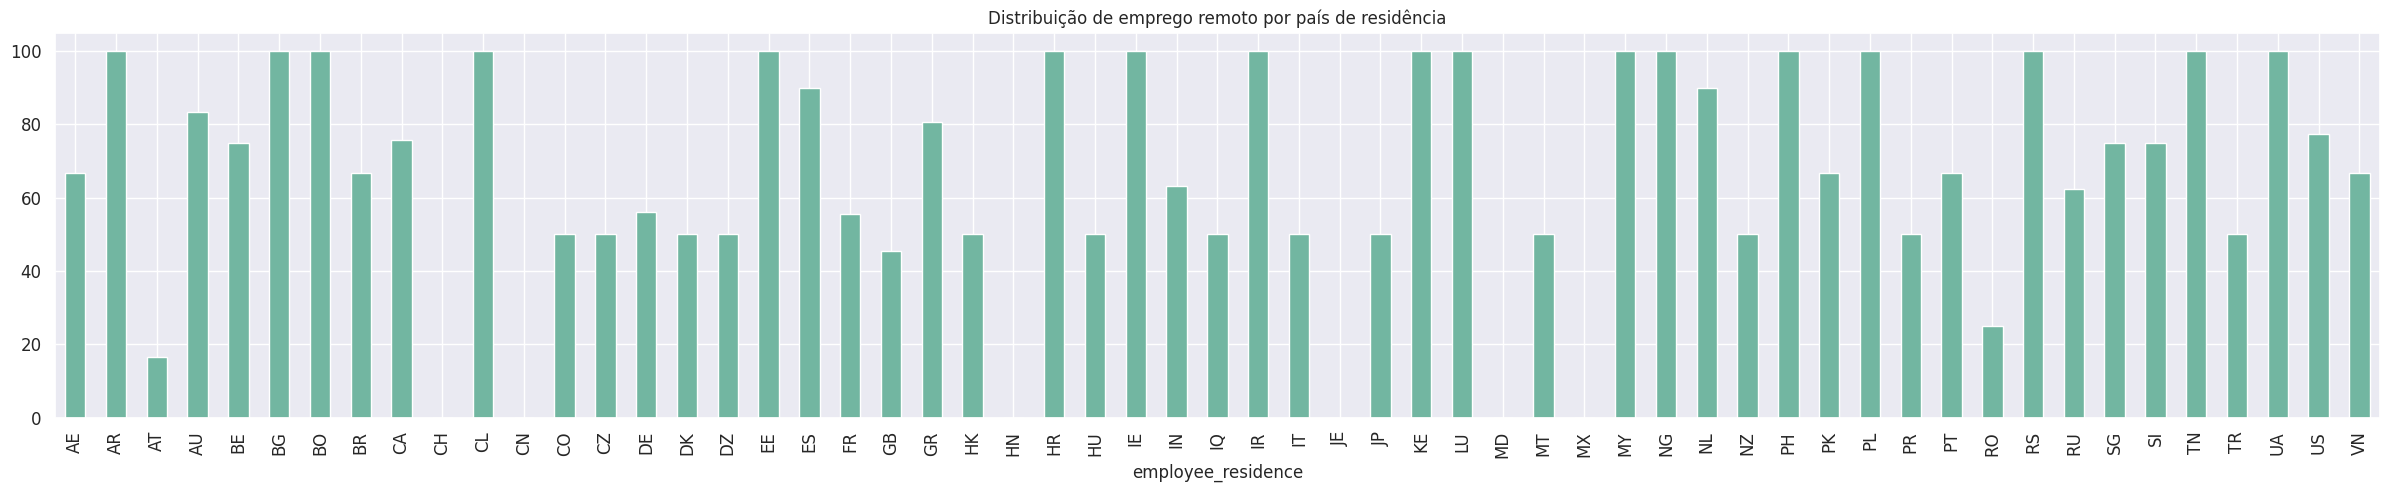

In [ ]:
#Plotar gráfico de distribuição de home office por país de residência
remoto_media = salario_ds.groupby('employee_residence')['remote_ratio'].mean().plot(kind='bar', figsize=(30,5), color='#72B6A1',
      title='Distribuição de emprego remoto por país de residência',
      y='employee_residence',
      fontsize=(12))

In [ ]:
#Listando países com a maior proporção de home office
top_paises = salario_ds.loc[salario_ds['remote_ratio'] > 60].groupby('employee_residence')['remote_ratio'].mean()
top_paises

employee_residence
AE    100.0
AR    100.0
AU    100.0
BE    100.0
BG    100.0
BO    100.0
BR    100.0
CA    100.0
CL    100.0
DE    100.0
EE    100.0
ES    100.0
FR    100.0
GB    100.0
GR    100.0
HR    100.0
IE    100.0
IN    100.0
IR    100.0
IT    100.0
JP    100.0
KE    100.0
LU    100.0
MY    100.0
NG    100.0
NL    100.0
PH    100.0
PK    100.0
PL    100.0
PT    100.0
RS    100.0
RU    100.0
SG    100.0
SI    100.0
TN    100.0
TR    100.0
UA    100.0
US    100.0
VN    100.0
Name: remote_ratio, dtype: float64

# **É evidente que a maioria das empresas que empregam profissionais da área de Ciência de Dados adotaram o modelo de trabalho remoto. Isso indica que as oportunidades também são ampliadas para profissionais estrangeiros, que podem trabalhar de suas próprias residências.**

# **Em uma matéria publicada no O Globo (Época), revela que em Portugal a pandemia fez o setor digital deslanchar. Mas logo as empresas detectaram falha no sistema: não havia mão de obra suficiente. Os formados na área de TI anualmente não chegariam a 2 mil, 10% da demanda. Dessa forma, começaram a contratar mais brasileiros para assumir os cargos de tecnologia.**

In [ ]:
#Listando e calculando a média salarial por proporção de trabalho remoto
media_salarial = salario_ds.groupby('remote_ratio')['salary_in_usd'].mean().round(2)
media_salarial

remote_ratio
0      106354.62
50      80823.03
100    122457.45
Name: salary_in_usd, dtype: float64

###### **0** = presencial;
###### **50** = híbrido;
###### **100** = remoto.

# **Apesar de estar bem próximo ao modelo presencial, se comparado com as demais proporções, os profissionais que trabalham no modelo remoto ganham mais.**

![URL99](https://telltaletv.com/wp-content/uploads/2018/08/tumblr_ojcrkoPnnu1uls29go2_640.gif)




---



# **O momento que estavámos esperando: conversão de USD para BRL!**

In [ ]:
#Listando e calculando a conversão da moeda de USD para BRL (considerado o valor do dólar no momento da publicação deste notebook)
moeda = salario_ds['salary_in_usd'].apply(lambda x: x * 4,9943)
salario_ds['salary_in_brl'] = moeda.astype(float).round()
salario_ds = salario_ds.sort_values('salary_in_brl', ascending=True)
salario_ds[['work_year', 'job_title', 'company_location', 'salary_currency', 'salary_in_usd', 'salary_in_brl']]

,work_year,job_title,company_location,salary_currency,salary_in_usd,salary_in_brl
176,2021,Data Scientist,MX,MXN,2859,11436.0
185,2021,Data Engineer,IR,USD,4000,16000.0
238,2021,Data Scientist,VN,USD,4000,16000.0
77,2021,3D Computer Vision Researcher,IN,INR,5409,21636.0
179,2021,Data Scientist,US,INR,5679,22716.0
...,...,...,...,...,...,...
225,2021,Principal Data Scientist,US,USD,416000,1664000.0
157,2021,Applied Machine Learning Scientist,US,USD,423000,1692000.0
33,2020,Research Scientist,US,USD,450000,1800000.0
97,2021,Financial Data Analyst,US,USD,450000,1800000.0


# **Se você estiver interessado em trabalhar para países estrangeiros, existe a possibilidade de receber até aproximadamente 2,4 milhões de reais (pouquinha coisa)!**

# **Ao analisar a lista acima, podemos ver que o maior salário pago foi registrado em 2021 nos Estados Unidos para o cargo de Engenheiro de Dados (Principal).**



---


# **Ao infinito e além!**

![99URL](https://i.pinimg.com/originals/b6/5f/65/b65f659239e5e5ff8f1826755f234e86.gif)

# **A área de Data Science está experimentando um crescimento significativo, com uma alta demanda por Data Scientists e Data Engineers, impulsionada pelo aumento do investimento em inteligência de dados. Além disso, o modelo de trabalho remoto apresenta oportunidades atraentes para os profissionais da área, pois as empresas estrangeiras reconhecem o potencial de recrutamento no Brasil. É interessante notar que profissionais plenos e sênior têm a possibilidade de receber boas remunerações, mesmo não ocupando posições executivas ou de diretoria.**